In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score
from difflib import SequenceMatcher
from tkinter import simpledialog
import matplotlib.pyplot as plt
from datetime import datetime
import tkinter as tk
import numpy as np
import easyocr
import cv2
import os

In [6]:
# Run this code. Importing easyocr won't work if you don't
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [7]:
reader = easyocr.Reader(['ch_tra', 'en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
img = cv2.imread('../dataset/IDCAR2015_Dataset/train/training_images/img_40.jpg')
result = reader.readtext(img)

In [9]:
# Prepare to store detected texts and confidence scores
detected_texts = []
confidence_scores = []

In [10]:
# Loop through the results and draw bounding boxes
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])  
    bottom_right = tuple([int(val) for val in detection[0][2]])  
    
    # Draw the rectangle (green box)
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
    
    # Extract detected text and confidence score
    detected_text = detection[1]
    confidence = detection[2]
    
    # Store detected text and confidence
    detected_texts.append(detected_text)
    confidence_scores.append(confidence)
    
    # Optionally, display the detected text on the image
    cv2.putText(img, detected_text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [11]:
now = datetime.now()
datetime_str = now.strftime("%Y%m%d_%H%M%S") 

output_path = os.path.join("results", f'result-{datetime_str}.jpg')  # Use a fixed filename or create dynamic filenames
cv2.imwrite(output_path, img)
print("Image saved.")

Image saved.


In [12]:
print("Detected Texts and Confidence Scores:")

for i, (text, score) in enumerate(zip(detected_texts, confidence_scores)):
    print(f"{i + 1}: {text} | Confidence: {score:.2f}")

Detected Texts and Confidence Scores:
1: Shopspin | Confidence: 0.66
2: SHO | Confidence: 0.00


# Analysis & Metrics

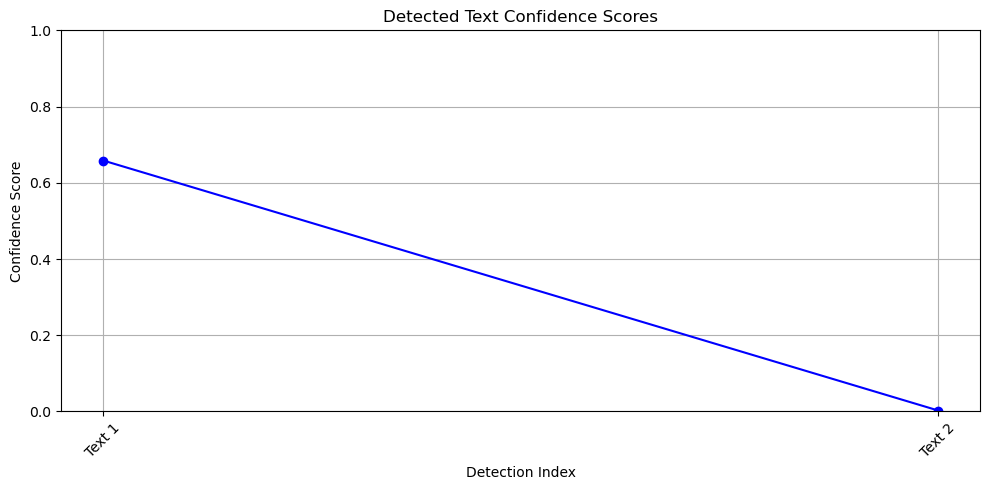

In [13]:
# Plotting the accuracy based on confidence scores
plt.figure(figsize=(10, 5))
plt.plot(confidence_scores, marker='o', linestyle='-', color='b')
plt.title('Detected Text Confidence Scores')
plt.xlabel('Detection Index')
plt.ylabel('Confidence Score')
plt.ylim(0, 1)  # Confidence scores are between 0 and 1
plt.grid()
plt.xticks(np.arange(len(detected_texts)), [f'Text {i+1}' for i in range(len(detected_texts))], rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Prepare data for the graph
texts = []
confidences = []
total_confidence = 0
num_detections = len(result)

# Gather data
for detection in result:
    detected_box, detected_text, confidence = detection
    total_confidence += confidence
    
    # Store detected text and confidence for the graph
    texts.append(detected_text)
    confidences.append(confidence)
    
    # Print detected text and confidence
    #print(f"Detected Text: {detected_text} | Confidence: {confidence:.2f}")

# Calculate average confidence
average_confidence = total_confidence / num_detections if num_detections > 0 else 0

# Output the average confidence
print(f"Average Confidence: {average_confidence:.2f}")

Average Confidence: 0.33


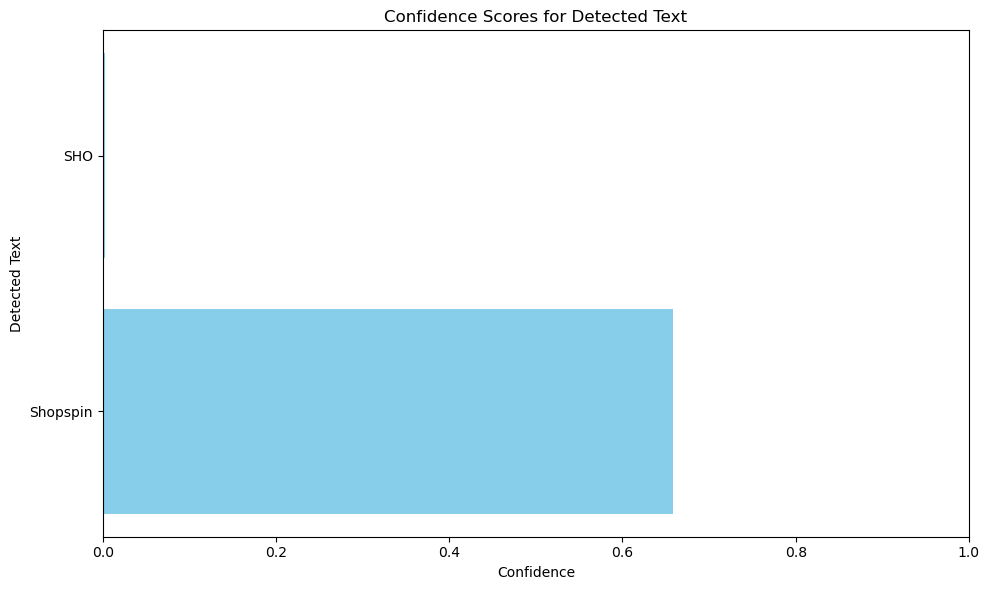

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(texts, confidences, color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Detected Text')
plt.title('Confidence Scores for Detected Text')
plt.xlim(0, 1)  # Confidence is between 0 and 1
plt.tight_layout()